In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

In [344]:
dfx = pd.read_csv("healthdata.csv")
dfy = pd.read_csv("healthdata.csv")
dfo = pd.read_csv("healthdata.csv")

In [345]:
def laplaceMechanism(x, epsilon):
    x += np.random.laplace(0, 1.0/epsilon, 1)[0]
    return x

def gaussianMechanism(x, epsilon):
    x += np.random.normal(0, 1.0/epsilon, 1)[0]
    return x

In [346]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [347]:
dfy = dfy.iloc[1:]
dfx['age'] = dfx['age'].apply(laplaceMechanism, args=(0.5,))
dfy['age'] = dfy['age'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='problem'>

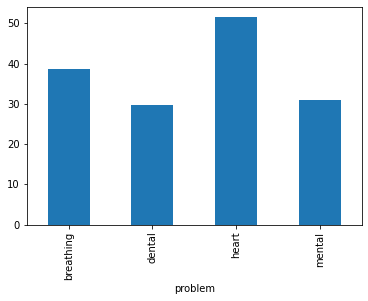

In [348]:
dfx.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

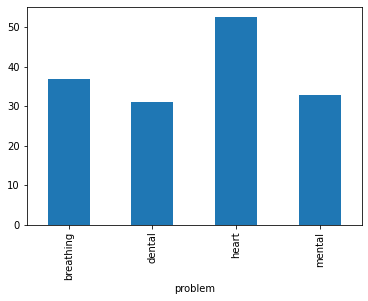

In [349]:
dfy.groupby("problem")['age'].mean().plot(kind='bar')

<AxesSubplot:xlabel='problem'>

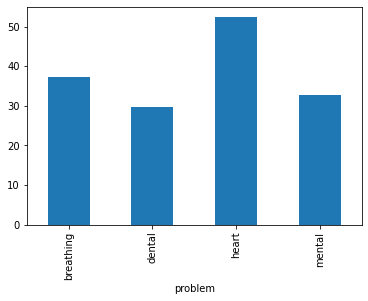

In [350]:
dfo.groupby("problem")['age'].mean().plot(kind='bar')

In [351]:
dfx['wage'] = dfx['wage'].apply(laplaceMechanism, args=(0.5,))
dfy['wage'] = dfy['wage'].apply(laplaceMechanism, args=(0.5,))

<AxesSubplot:xlabel='insured'>

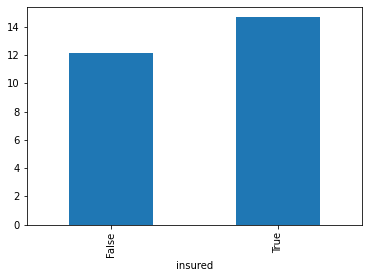

In [352]:
dfx.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

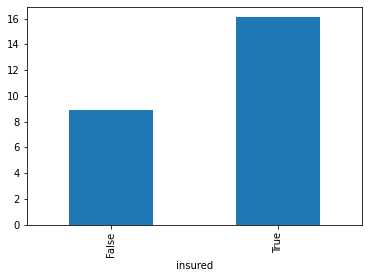

In [353]:
dfy.groupby("insured")['wage'].mean().plot(kind='bar')

<AxesSubplot:xlabel='insured'>

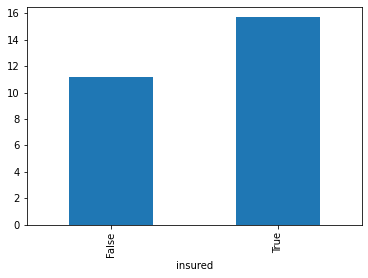

In [354]:
dfo.groupby("insured")['wage'].mean().plot(kind='bar')

In [355]:
epsilons = np.logspace(-2,1,25)
df_original = pd.read_csv("healthdata.csv")

In [356]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    df_private = pd.read_csv("healthdata.csv")
    df_private['wage'] = df_private['wage'].apply(laplaceMechanism, args=(epsilon,))
    laplace_rmse.append(mean_squared_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist(), squared=False))
    laplace_mape.append(mean_absolute_percentage_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist()))

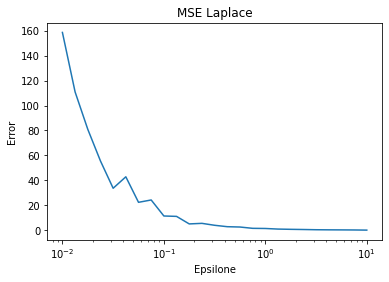

In [357]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("MSE Laplace")
plt.show()

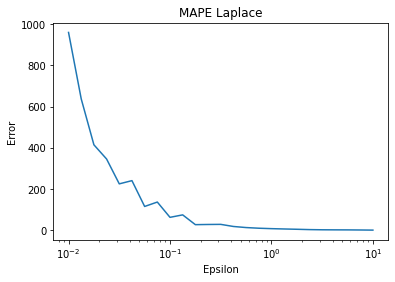

In [358]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

In [359]:
gaussian_mse = []
gaussian_mape = []
for epsilon in epsilons:
    df_private = pd.read_csv("healthdata.csv")
    df_private['wage'] = df_private['wage'].apply(gaussianMechanism, args=(epsilon,))
    gaussian_mse.append(mean_squared_error(df_original['wage'], 
                df_private['wage'].to_numpy().tolist(), squared=False))
    gaussian_mape.append(mean_absolute_percentage_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist()))

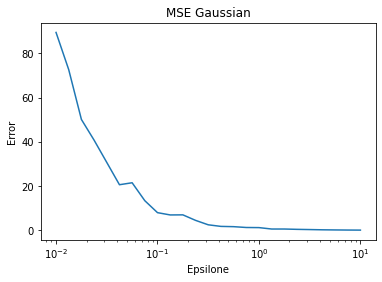

In [360]:
plt.semilogx(epsilons, gaussian_mse)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("MSE Gaussian")
plt.show()

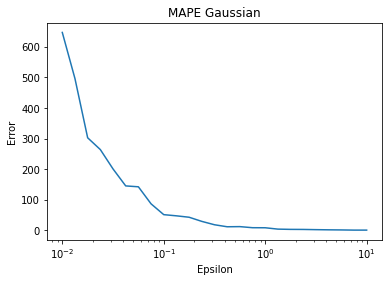

In [361]:
plt.semilogx(epsilons, gaussian_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Gaussian")
plt.show()

In [362]:
#import sklearn as sk
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from sklearn.metrics import classification_report, accuracy_score

#df = pd.read_csv("healthdata.csv")
#y = df['insured'].to_numpy().reshape(-1, 1)
#X = df['wage'].to_numpy().reshape(-1, 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#svclassifier = SVC(kernel='linear')
#svclassifier.fit(X_train, y_train)

#print(accuracy_score(y_test,y_pred))